In [1]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [2]:
import pandas as pd
import numpy as np

In [3]:
red_df = pd.read_csv('winequality-red.csv')
white_df = pd.read_csv('winequality-white.csv')

In [4]:
red_df.shape, white_df.shape

((1599, 12), (4898, 12))

In [5]:
red_df['type'] = 'red'
white_df['type'] = 'white'

In [6]:
wine = pd.concat([red_df,white_df], axis=0)

In [7]:
wine.shape

(6497, 13)

In [8]:
1599+4898

6497

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
wine.columns = wine.columns.str.replace(' ','_')

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [12]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
# 와인 품질 의 종류
# quality

In [14]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [15]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

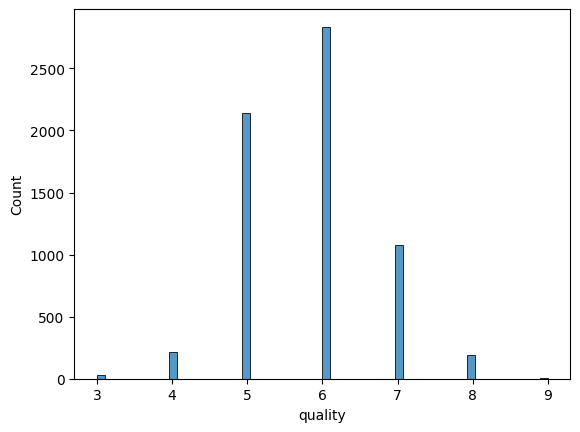

In [17]:
sns.histplot(data=wine['quality'])
plt.show()

In [18]:
# 와인별 품질에 대한 describe  
grouped = wine.groupby(['type'])
grouped['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [19]:
grouped['quality'].describe().T

type,red,white
count,1599.000000,4898.000000
mean,5.636023,5.877909
std,0.807569,0.885639
min,3.000000,3.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,8.000000,9.000000


In [20]:
grouped['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [21]:
grouped['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [22]:
grouped['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


# t-검증

In [23]:
!pip install statsmodels

In [24]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [25]:
red_wine_quality = wine.loc[ wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[ wine['type'] == 'white', 'quality']

In [26]:
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [27]:
wine.columns[:-2]
# formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid'

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [28]:
result = ''
for idx,w in enumerate(wine.columns[:-2]):
    if idx == len(wine.columns[:-2])-1:
        result += f'{w}'
    else:        
        result += f'{w} + '

In [29]:
result = 'quality ~ '+ result

In [30]:
result

'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [31]:
regression_result =  ols(result,data=wine).fit()

In [32]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:20:53   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# quality와 type열은 회귀 분석 모델에서 제외 .. 독립변수만 추출
wine[wine.columns.difference(['quality','type'])].head(1) # 컬럼 정렬

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.0,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.7


In [34]:
wine.iloc[:,:-2].head(1) # 컬럼정렬 x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [35]:
sample1 = wine.iloc[:,:-2]

In [36]:
sample1 = sample1[:5]

In [37]:
sample1_predict =  regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [38]:
wine = wine.reset_index(drop=1)

In [39]:
wine.loc[:4,'quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# 타이타닉의 생존율 분석

In [40]:
titanic = sns.load_dataset('titanic')

In [41]:
titanic.rename(columns = {'sex':'gender'},inplace=True)

In [42]:
titanic.head(1)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [43]:
# 결측치 확인

In [44]:
titanic.isnull().sum()

survived         0
pclass           0
gender           0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
# 나이는 전체 나이 평균으로 대체

In [46]:
titanic['age'].fillna(titanic['age'].median(),inplace=True)

In [47]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [48]:
titanic['embark_town'].fillna('Southampton',inplace=True)

In [49]:
titanic['deck'].fillna('C',inplace=True)

In [50]:
titanic['embarked'].fillna('S',inplace=True)

In [51]:
titanic.isnull().sum()

survived       0
pclass         0
gender         0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [52]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

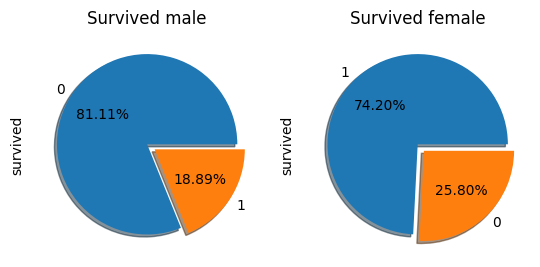

In [53]:
plt.subplot(1,2,1)
titanic[titanic['gender'] == 'male']['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%',shadow=True)
plt.title('Survived male')

plt.subplot(1,2,2)
titanic[titanic['gender'] == 'female']['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%',shadow=True)
plt.title('Survived female')

plt.show()


# 등급별 생존자 수
    sns.countplot  , hue = 'survived'

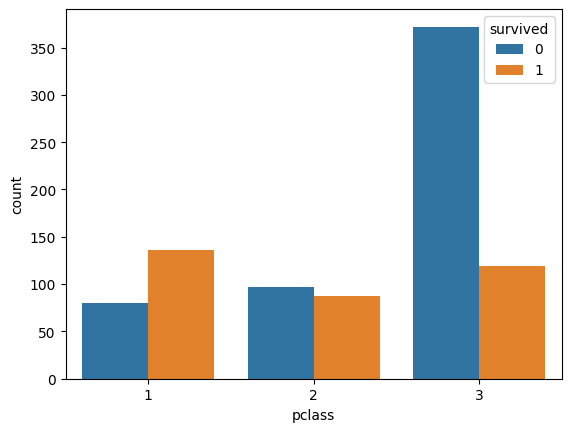

In [54]:
sns.countplot(data=titanic,hue='survived', x='pclass')
plt.show()

In [55]:
# 상관계수

In [56]:
titanic.corr(method='pearson')
# titanic.iloc[:,:2].corr()

C:\Users\user\AppData\Local\Temp\ipykernel_15084\683254121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(method='pearson')


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [57]:
# 특정변수 사이의 상관관계

In [58]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053259

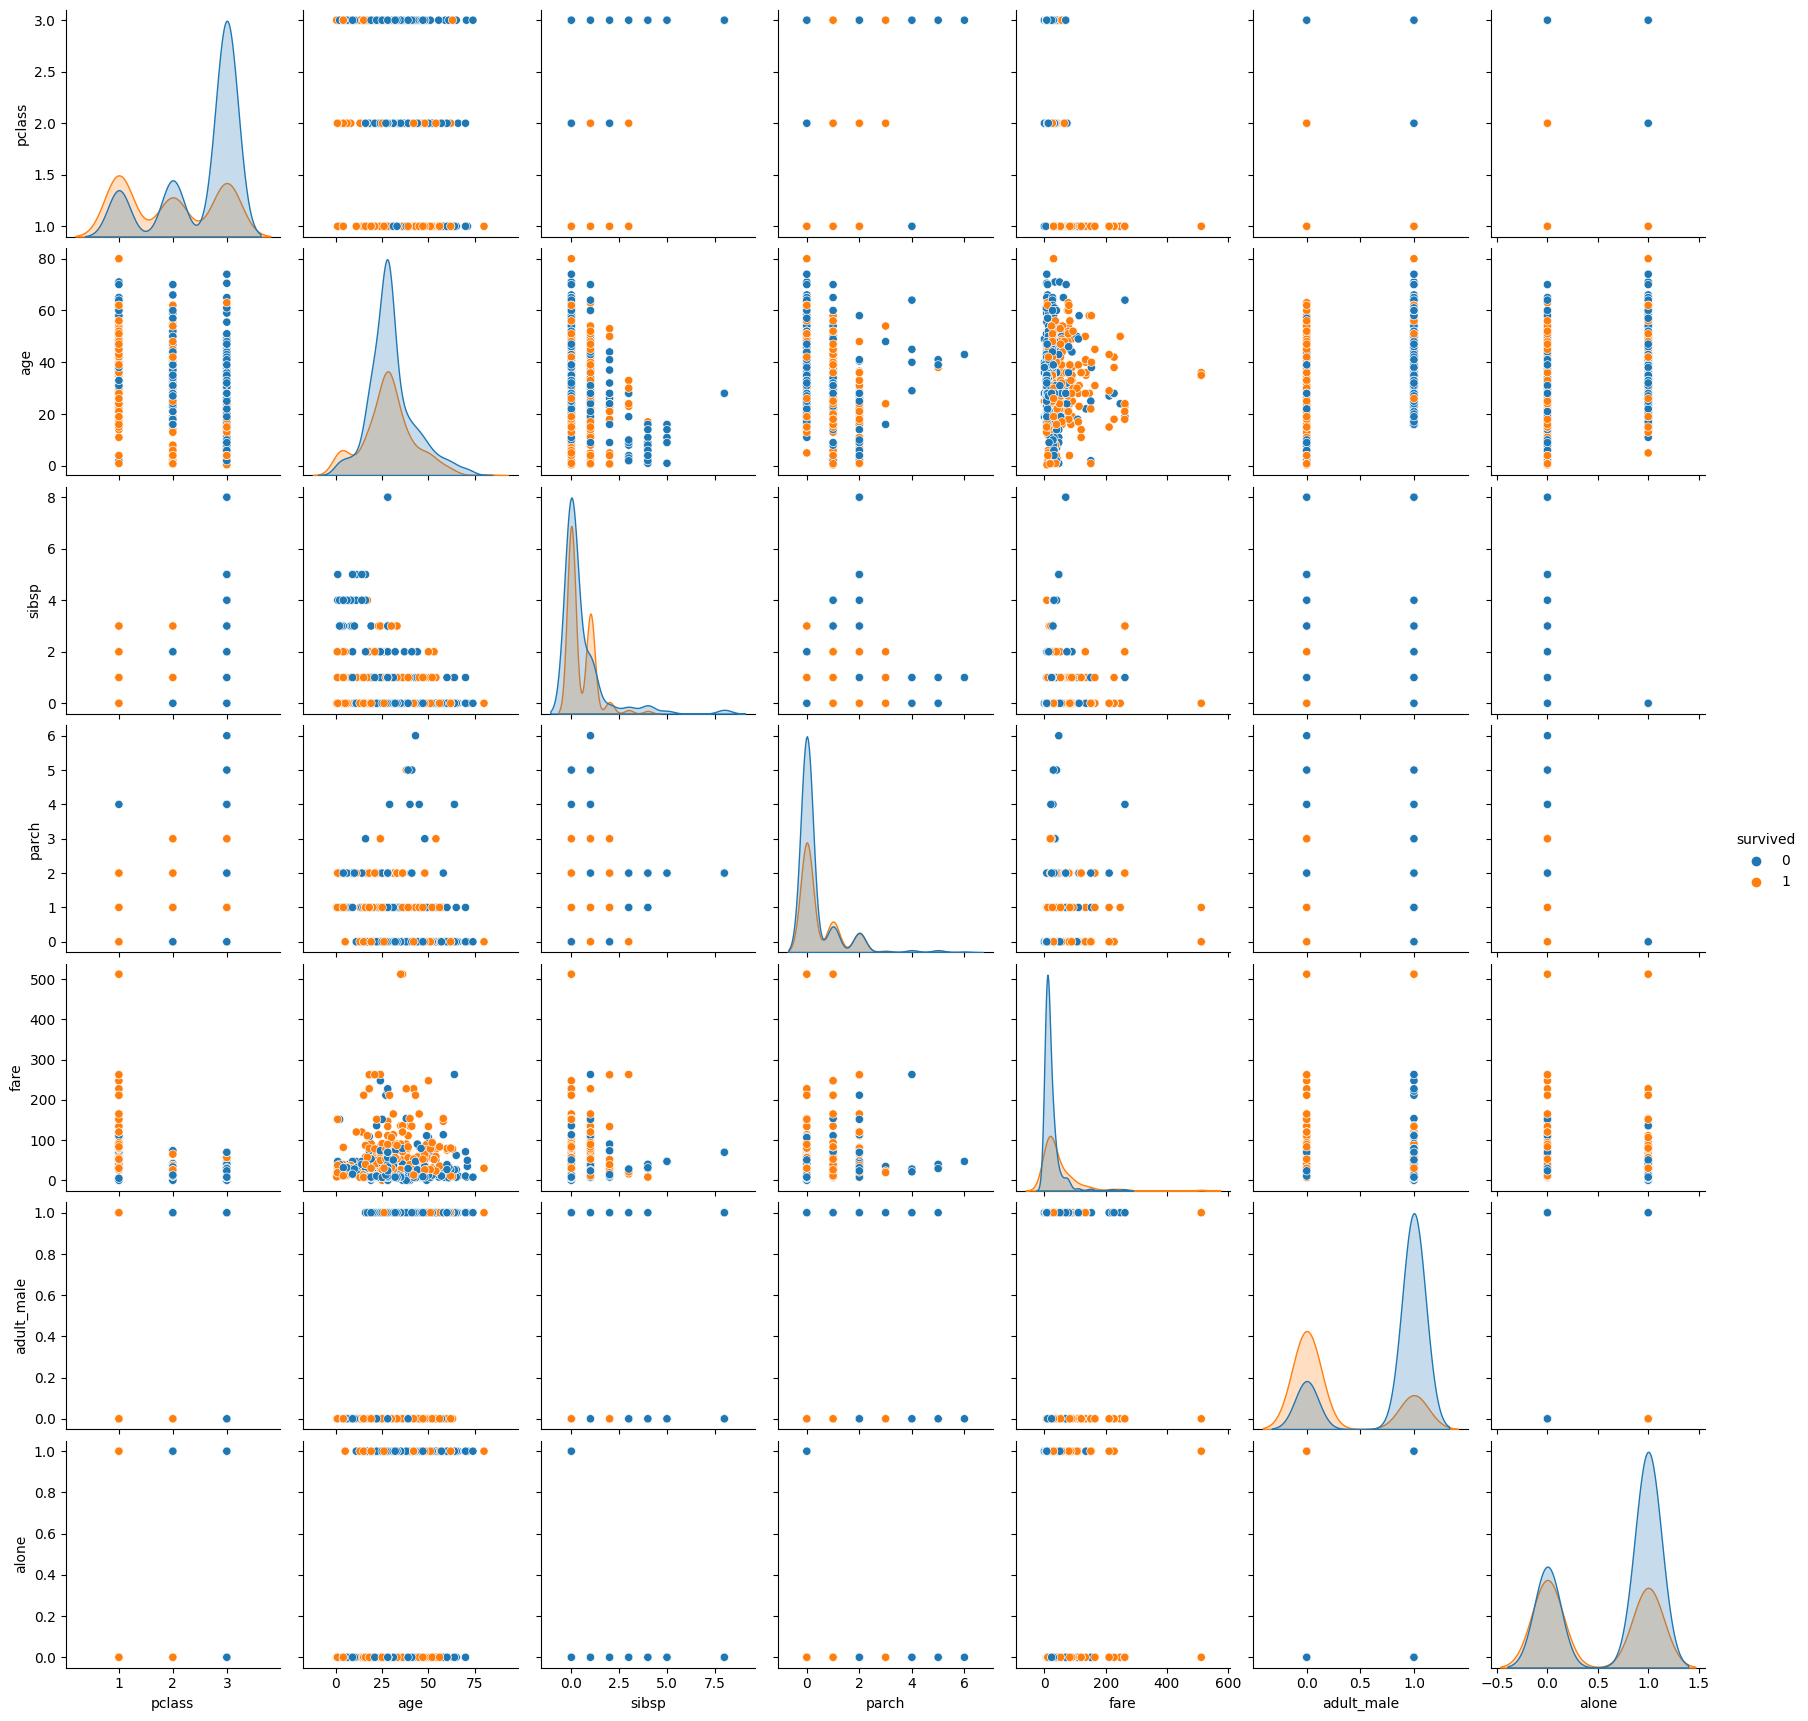

In [59]:
# 변수간의 상관관계를 시각화
sns.pairplot(titanic,hue='survived')
plt.show()

In [60]:
# 두 변수간의 상관관계 시각화

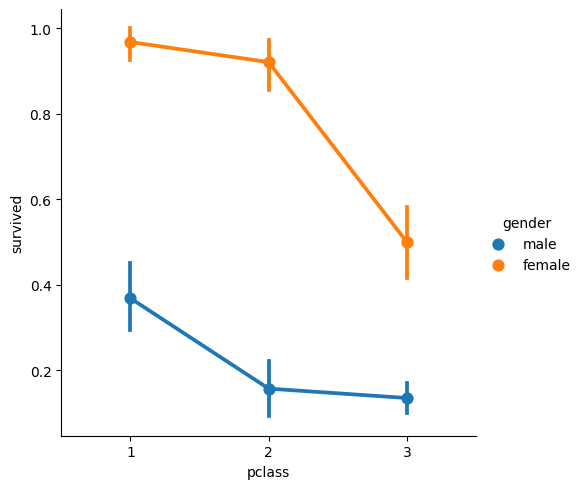

In [61]:
sns.catplot(data= titanic, x='pclass', y = 'survived', hue='gender',kind='point')
plt.show()

In [62]:
# 변수간의 상관계수를 히트맵으로 시각화
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [63]:
titanic['age2'] =  titanic['age'].apply(category_age)

In [67]:
titanic['gender2'] = [1 if i == 'male' else 0 for i in titanic['gender'] ]    

In [72]:
# titanic['gender2'] = titanic['gender'].map({'male':1, 'female':0})

In [69]:
titanic['gender2'].value_counts()

1    577
0    314
Name: gender2, dtype: int64

In [76]:
titanic['alone2'] = titanic['alone'].map({False:0,True:1})

In [77]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,gender2,alone2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1,1


In [78]:
# age2, gender2, pclass, parch, fare,alone2
heatmap_data =  titanic[['age2', 'gender2', 'pclass', 'parch', 'fare','alone2']]

In [79]:
# 컬러맵
colormap = plt.cm.RdBu

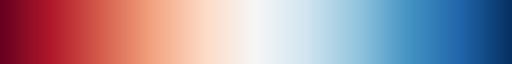

In [80]:
colormap

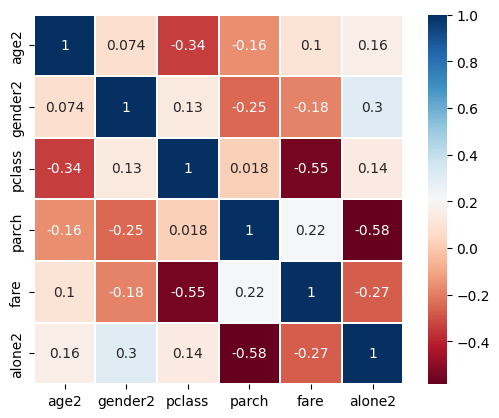

In [81]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap,linecolor='white',annot=True,annot_kws={'size':10} )
plt.show()

In [82]:
# 예측모델.... 머신러닝

In [83]:
# 결정트리
# 데이터확보 - 데이터 처리(스케일링, 전처리, 원핫인코딩) - 학습용 데이터 선택(피처선택) - 학습용과 검증용을 분리 - 모델 선택 - 학습
# 평가(F1_Score) -> 결과가 만족스러우면.. 적용(배포)
# 실전.... 예측..

In [85]:
train_titanic = titanic[['survived','gender2','alone2','age2','fare','pclass']]

In [86]:
X = train_titanic.iloc[:,1:]
Y = train_titanic.iloc[:,1]

In [87]:
X.shape, Y.shape

((891, 5), (891,))

In [88]:
# X 스케일링 (사실은... 트리알고리즘은 스케일링이 필요없음)

In [89]:
# train, test 데이터로 분리
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_trian,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier(max_depth=3)

In [94]:
dtc.fit(x_train,y_trian)

DecisionTreeClassifier(max_depth=3)

In [95]:
from sklearn.metrics import f1_score

In [97]:
y_test_hat = dtc.predict(x_test)

In [98]:
f1_score(y_test,y_test_hat)

1.0

In [99]:
dtc.score(x_test,y_test)

1.0